In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy 
import numpy as np
from matplotlib import pyplot as plt
import os

Found 4024 files belonging to 2 classes.


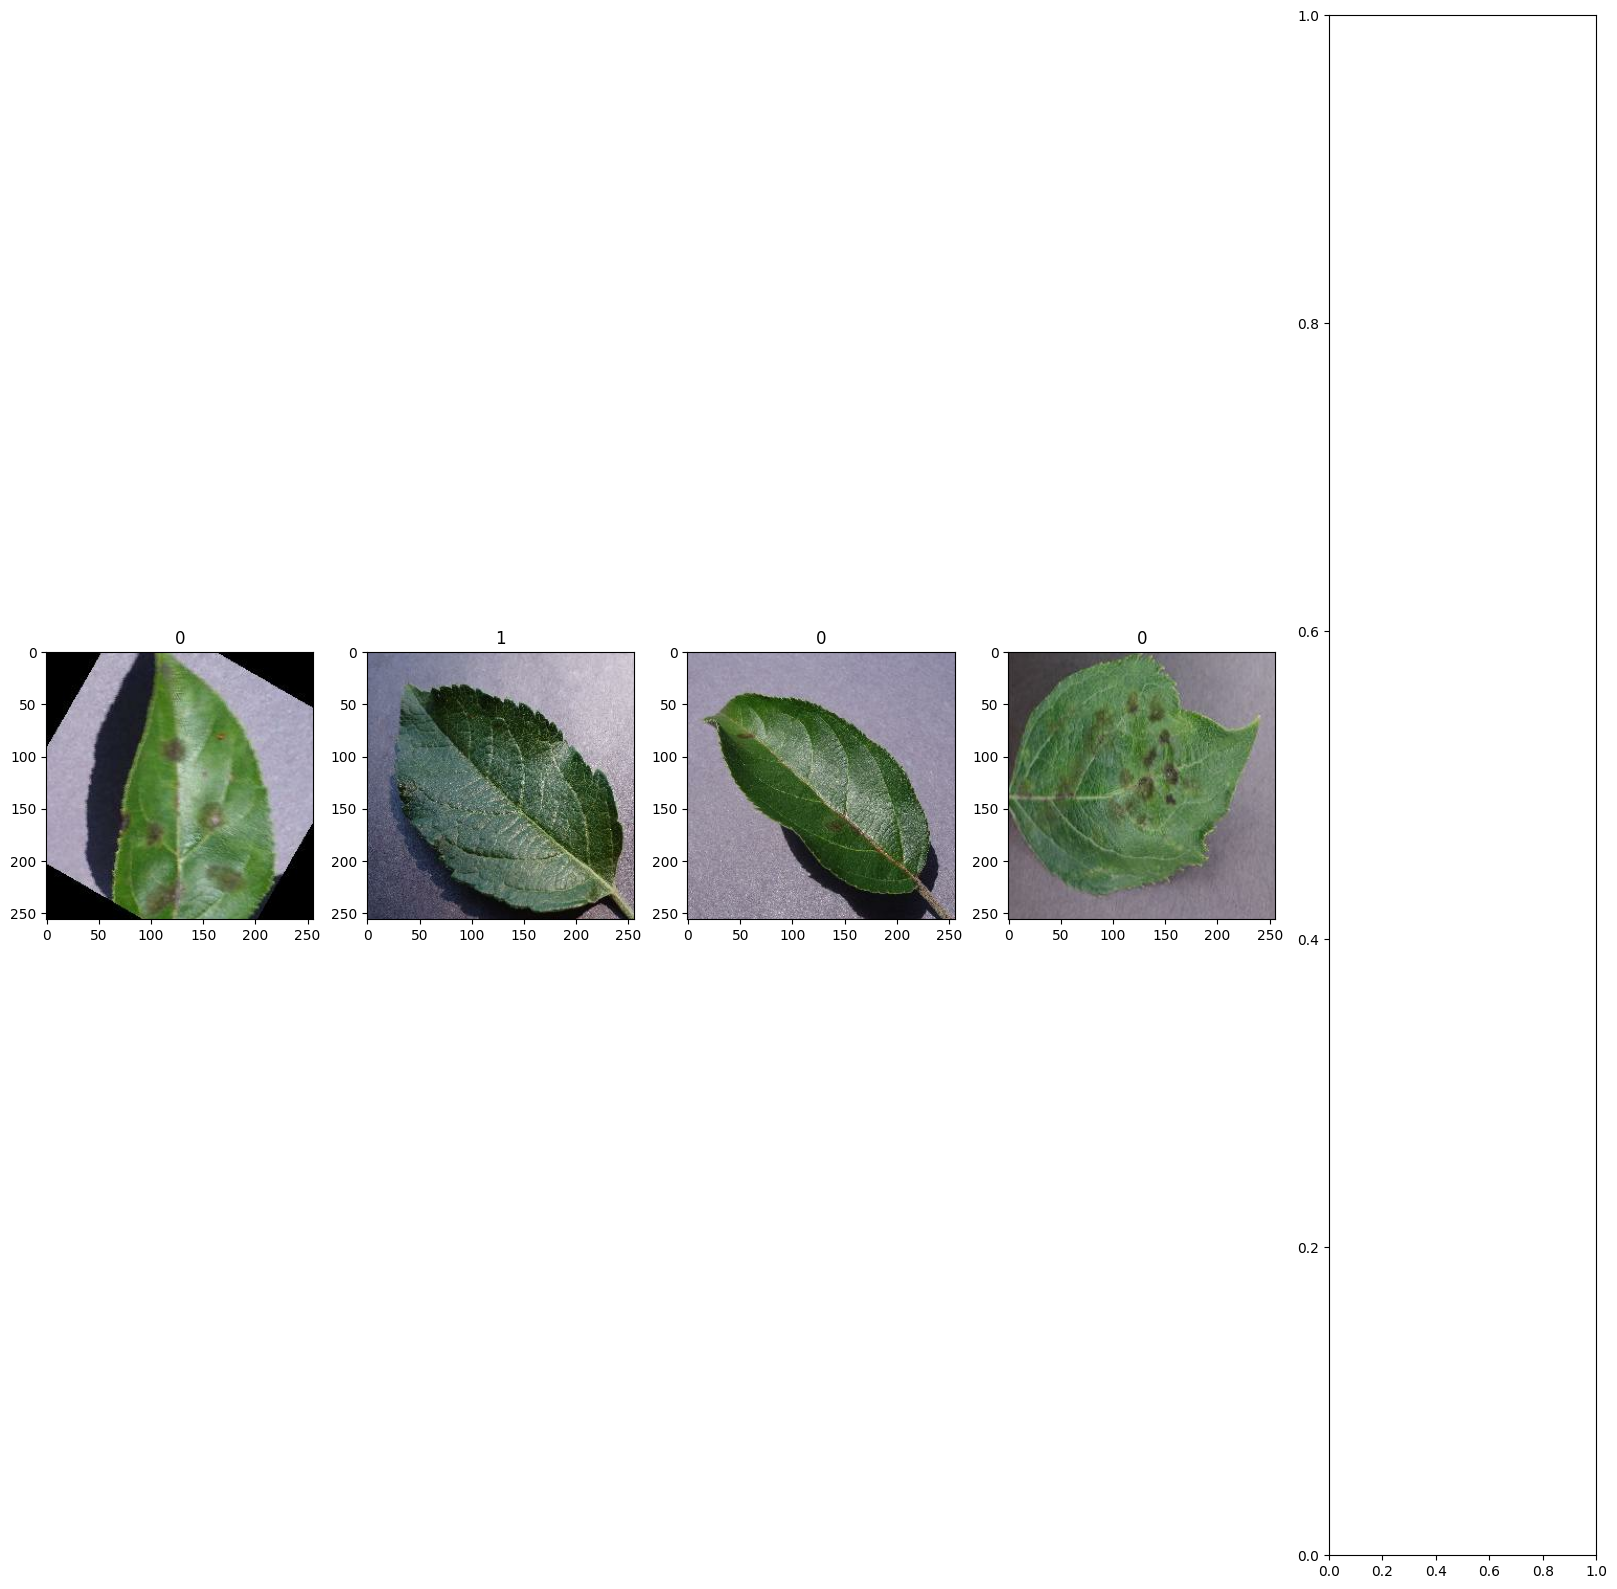

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

train_data = tf.keras.utils.image_dataset_from_directory('apple_scab_dataset/train')
train_data_iterator = train_data.as_numpy_iterator()
train_batch = train_data_iterator.next()

fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(train_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])

In [3]:
data = train_data.map(lambda x,y: (x/255, y))

In [4]:
data.as_numpy_iterator().next()

(array([[[[0.5254902 , 0.4509804 , 0.42745098],
          [0.45882353, 0.38431373, 0.36078432],
          [0.5568628 , 0.48235294, 0.45882353],
          ...,
          [0.49019608, 0.40784314, 0.3882353 ],
          [0.5137255 , 0.43137255, 0.4117647 ],
          [0.47843137, 0.39607844, 0.3764706 ]],
 
         [[0.6       , 0.5254902 , 0.5019608 ],
          [0.5529412 , 0.47843137, 0.45490196],
          [0.62352943, 0.54901963, 0.5254902 ],
          ...,
          [0.5568628 , 0.4745098 , 0.45490196],
          [0.4509804 , 0.36862746, 0.34901962],
          [0.5529412 , 0.47058824, 0.4509804 ]],
 
         [[0.5176471 , 0.44313726, 0.41960785],
          [0.46666667, 0.39215687, 0.36862746],
          [0.4627451 , 0.3882353 , 0.3647059 ],
          ...,
          [0.5058824 , 0.42352942, 0.40392157],
          [0.5764706 , 0.49411765, 0.4745098 ],
          [0.54509807, 0.4627451 , 0.44313726]],
 
         ...,
 
         [[0.79607844, 0.7607843 , 0.73333335],
          [0.79607

In [5]:
train_size = int(len(data))*.7
val_size = int(len(data))*.2
test_size = int(len(data))*.1

In [6]:
train_size = int(train_size)
val_size = int(val_size)
test_size = int(test_size)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)


In [7]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
model = Sequential()

In [9]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

## Train

In [12]:
logdir='logs'

In [13]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [14]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


88/88 [==============================] - 59s 662ms/step - loss: 0.3958 - accuracy: 0.8171 - val_loss: 0.1794 - val_accuracy: 0.9400
Epoch 2/20
88/88 [==============================] - 52s 584ms/step - loss: 0.1947 - accuracy: 0.9237 - val_loss: 0.1647 - val_accuracy: 0.9325
Epoch 3/20
88/88 [==============================] - 49s 557ms/step - loss: 0.1087 - accuracy: 0.9609 - val_loss: 0.1550 - val_accuracy: 0.9475
Epoch 4/20
88/88 [==============================] - 627s 7s/step - loss: 0.0915 - accuracy: 0.9666 - val_loss: 0.1945 - val_accuracy: 0.9350
Epoch 5/20
88/88 [==============================] - 1102s 13s/step - loss: 0.0889 - accuracy: 0.9702 - val_loss: 0.1928 - val_accuracy: 0.9275
Epoch 6/20
88/88 [==============================] - 1197s 14s/step - loss: 0.0664 - accuracy: 0.9759 - val_loss: 0.0803 - val_accuracy: 0.9663
Epoch 7/20
88/88 [==============================] - 1451s 17s/step - loss: 0.0671 - accuracy: 0.9734 - val_loss: 0.1025 - val_accuracy: 0.9538
Epoch 8/20
8

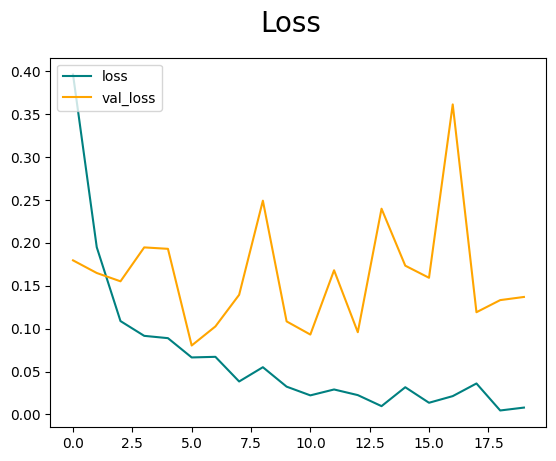

In [15]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

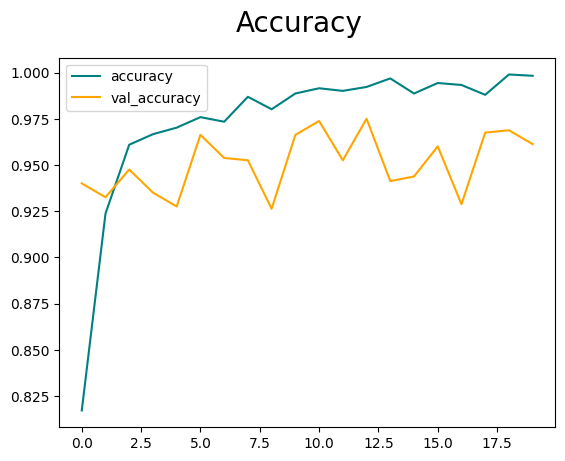

In [16]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [17]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [18]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [19]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 142ms/step
tf.Tensor(0.935, shape=(), dtype=float32) tf.Tensor(0.9790576, shape=(), dtype=float32) tf.Tensor(0.9557292, shape=(), dtype=float32)


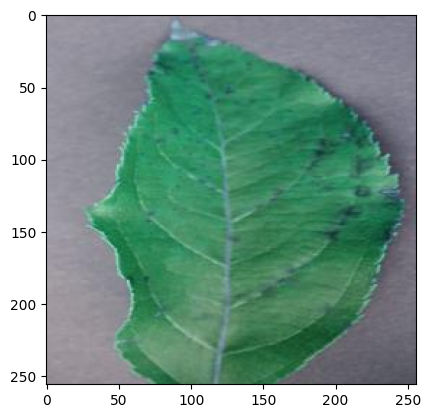

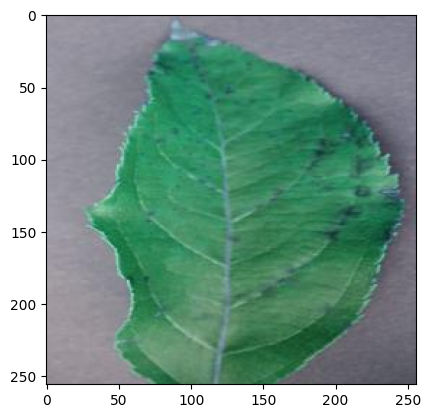

1/1 [==============================] - 0s 37ms/step
Infected plant!


In [21]:
import cv2

img = cv2.imread('apple_scab_dataset/valid/Apple___healthy/0c55b379-c6e7-4b89-959f-abc506fed437___RS_HL 5927.JPG')
plt.imshow(img)
plt.show()

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

yhat = model.predict(np.expand_dims(resize/255, 0))

yhat

if yhat > 0.5: 
    print(f'Healthy plant!')
else:
    print(f'Infected plant!')

